<a href="https://colab.research.google.com/github/ruppppak/Project-2-Diabetes-Prediction-using-Machine-Learning-with-Python/blob/main/Project_2_Diabetes_Prediction_using_Machine_Learning_with_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

Data collection and anaylsis


In [6]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [7]:
print(diabetes_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
diabetes_dataset.shape

(768, 9)

In [9]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [10]:
X= diabetes_dataset.drop(columns='Outcome',axis=1)
Y= diabetes_dataset['Outcome']


In [11]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [13]:
# data Standardization
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [14]:
standardized_data = scaler.transform(X)

In [15]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
scaler = StandardScaler()
scaler.fit(X)
# %%
standardized_data = scaler.transform(X)
# %%
standardized_data
# %%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2) # Replacing the wrong alias (train_set_split) with the correct alias (train_test_split)

In [17]:
# stratify is used to equally distribute the data the number of diabetes and non didabetes
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [18]:
# Training the model
# SVC = Support Vector Classifier

classifier= svm.SVC(kernel='linear')

In [19]:
# Training the support Vector

classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Find the accuracy score

In [20]:
X_train_accuracy=classifier.predict(X_train)
training_data_accuracy= accuracy_score(X_train_accuracy,Y_train)

In [21]:
print('ACCURACY SCORE OF THE TRAINIGN DATA IS ',training_data_accuracy)

0.7833876221498371


finding accuracy of test data


In [23]:
X_test_accuracy=classifier.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_accuracy,Y_test) # Replacing Y_train with Y_test
print('ACCURACY SCORE OF THE TEST DATA IS ',testing_data_accuracy)

ACCURACY SCORE OF THE TEST DATA IS  0.7727272727272727


## Making a predictive system

In [28]:
input_data = (0,118,84,47,230,45.8,0.551,31)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)  # This line was removed to avoid printing the standardized data

prediction = classifier.predict(std_data)
#print(prediction) # This line was removed to avoid printing the raw prediction

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

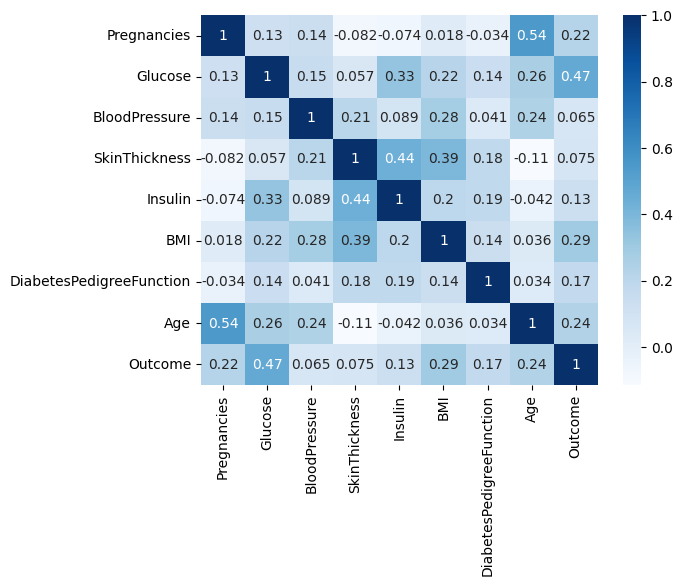

In [35]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame, replace it with the actual variable if different
# For example: df = diabetes_dataset

sns.heatmap(diabetes_dataset.corr(), cmap='Blues', annot=True) # Changed 'blues' to 'Blues' and 'cannot' to 'annot'